<a href="https://colab.research.google.com/github/raghrao/NLP/blob/main/KeystrokeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import randint
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/DSL-StrongPasswordData.csv')

In [4]:
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [5]:
data.subject.nunique()

51

In [6]:
data.shape

(20400, 34)

In [7]:
seed(1)
cols=data.columns.values.tolist()
X1 = pd.DataFrame(columns = cols)
X2 = pd.DataFrame(columns = cols)
Y =  pd.DataFrame(columns = ['isSame'])
subjects=data.subject.unique()



In [8]:
for i in range(len(subjects)):
  sub = subjects[i]
  df=pd.DataFrame.from_dict(data[data.subject==sub])
  df=df.reset_index(drop=True)
  for j in range(200):
    value1 = randint(0, 399)
    value2 = randint(0, 399)
    if (value1 == value2):
      while value1 == value2 :
        value2 = randint(0,399)   
    X1=X1.append(df.loc[value1].to_frame().transpose())
    X2=X2.append(df.loc[value2].to_frame().transpose())
    df1 = {'isSame': 1}
    Y=Y.append(df1, ignore_index = True)

In [9]:
for i in range(len(subjects)):
  sub = subjects[i]
  df=pd.DataFrame.from_dict(data[data.subject!=sub])
  df=df.reset_index(drop=True)
  row,col=df.shape
  for j in range(200):
    value1 = randint(0, row-1)
    value2 = randint(0, row-1)
    if (value1 == value2):
      while value1 == value2 :
        value2 = randint(0,row-1)   
    X1=X1.append(df.loc[value1].to_frame().transpose())
    X2=X2.append(df.loc[value2].to_frame().transpose())
    df1 = {'isSame': 0}
    Y=Y.append(df1, ignore_index = True)

In [10]:
X1=X1.drop(['subject','sessionIndex','rep'], axis=1)
X1.reset_index(drop=True)

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.0927,0.2167,0.124,0.0787,0.1257,0.047,0.075,0.1595,0.0845,0.0847,...,0.1135,0.1669,0.0534,0.0634,0.1742,0.1108,0.0964,0.3351,0.2387,0.1029
1,0.1528,0.1654,0.0126,0.127,0.1547,0.0277,0.1264,0.1304,0.004,0.1154,...,0.147,0.0977,-0.0493,0.1644,0.2444,0.08,0.161,0.3688,0.2078,0.2027
2,0.0871,0.1353,0.0482,0.0839,0.1576,0.0737,0.075,0.121,0.046,0.0927,...,0.1169,0.0776,-0.0393,0.0982,0.2067,0.1085,0.0932,0.22,0.1268,0.0829
3,0.0842,0.1261,0.0419,0.0705,0.1106,0.0401,0.0597,0.0877,0.028,0.0795,...,0.0998,0.0908,-0.009,0.0589,0.1605,0.1016,0.0742,0.2989,0.2247,0.0657
4,0.0866,0.1507,0.0641,0.0884,0.1241,0.0357,0.0578,0.1048,0.047,0.0876,...,0.1072,0.0858,-0.0214,0.0761,0.1711,0.095,0.0713,0.187,0.1157,0.0681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,0.0832,0.0992,0.016,0.0737,0.1331,0.0594,0.0523,0.3463,0.294,0.0568,...,0.1093,0.089,-0.0203,0.0687,0.1553,0.0866,0.0663,0.1683,0.102,0.0948
20396,0.071,0.3235,0.2525,0.0576,0.1086,0.051,0.0589,0.1022,0.0433,0.0576,...,0.0818,0.1064,0.0246,0.0533,0.1773,0.124,0.0618,0.2187,0.1569,0.0705
20397,0.0697,0.1274,0.0577,0.0633,0.0858,0.0225,0.0554,0.0813,0.0259,0.0594,...,0.0828,0.067,-0.0158,0.0839,0.1,0.0161,0.0736,0.1787,0.1051,0.0522
20398,0.1299,0.1097,-0.0202,0.1199,0.1569,0.037,0.128,0.081,-0.047,0.1389,...,0.1851,0.1191,-0.066,0.1466,0.1101,-0.0365,0.1138,0.2551,0.1413,0.0979


In [11]:
X1.head()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
68,0.0927,0.2167,0.124,0.0787,0.1257,0.047,0.075,0.1595,0.0845,0.0847,...,0.1135,0.1669,0.0534,0.0634,0.1742,0.1108,0.0964,0.3351,0.2387,0.1029
391,0.1528,0.1654,0.0126,0.127,0.1547,0.0277,0.1264,0.1304,0.004,0.1154,...,0.147,0.0977,-0.0493,0.1644,0.2444,0.08,0.161,0.3688,0.2078,0.2027
130,0.0871,0.1353,0.0482,0.0839,0.1576,0.0737,0.075,0.121,0.046,0.0927,...,0.1169,0.0776,-0.0393,0.0982,0.2067,0.1085,0.0932,0.22,0.1268,0.0829
253,0.0842,0.1261,0.0419,0.0705,0.1106,0.0401,0.0597,0.0877,0.028,0.0795,...,0.0998,0.0908,-0.009,0.0589,0.1605,0.1016,0.0742,0.2989,0.2247,0.0657
230,0.0866,0.1507,0.0641,0.0884,0.1241,0.0357,0.0578,0.1048,0.047,0.0876,...,0.1072,0.0858,-0.0214,0.0761,0.1711,0.095,0.0713,0.187,0.1157,0.0681


In [12]:
X2=X2.drop(['subject','sessionIndex','rep'], axis=1)
X2.reset_index(drop=True)

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.0905,0.1047,0.0142,0.0837,0.1471,0.0634,0.0626,0.0766,0.014,0.0808,...,0.1,0.1096,0.0096,0.0842,0.185,0.1008,0.0858,0.196,0.1102,0.0715
1,0.1225,0.2626,0.1401,0.0755,0.1328,0.0573,0.0855,0.1539,0.0684,0.0737,...,0.114,0.1719,0.0579,0.0784,0.2146,0.1362,0.0869,0.2984,0.2115,0.0591
2,0.1198,0.2079,0.0881,0.0755,0.2787,0.2032,0.0726,0.1655,0.0929,0.0729,...,0.1148,0.208,0.0932,0.0874,0.2434,0.156,0.089,0.2636,0.1746,0.0866
3,0.1362,0.1989,0.0627,0.1196,0.1553,0.0357,0.1212,0.1305,0.0093,0.1127,...,0.147,0.1542,0.0072,0.1072,0.1898,0.0826,0.1399,0.2562,0.1163,0.1146
4,0.0934,0.2221,0.1287,0.094,0.1378,0.0438,0.0697,0.1584,0.0887,0.0985,...,0.1162,0.1133,-0.0029,0.0779,0.1737,0.0958,0.0861,0.21,0.1239,0.0663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,0.0728,0.3014,0.2286,0.0657,0.1572,0.0915,0.0486,0.1707,0.1221,0.0517,...,0.0939,0.1773,0.0834,0.067,0.1854,0.1184,0.0979,0.2505,0.1526,0.0652
20396,0.1003,0.1316,0.0313,0.0676,0.1136,0.046,0.0826,0.0845,0.0019,0.0681,...,0.0607,0.1048,0.0441,0.0795,0.2236,0.1441,0.0729,0.1886,0.1157,0.0584
20397,0.157,0.2263,0.0693,0.119,0.7254,0.6064,0.1473,0.3584,0.2111,0.1694,...,0.1168,0.295,0.1782,0.0847,0.2393,0.1546,0.1059,0.3388,0.2329,0.0932
20398,0.0573,0.1945,0.1372,0.1209,0.136,0.0151,0.0676,0.184,0.1164,0.114,...,0.0977,0.0832,-0.0145,0.1183,0.0763,-0.042,0.1212,0.1107,-0.0105,0.0896


In [13]:
X2.head()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
291,0.0905,0.1047,0.0142,0.0837,0.1471,0.0634,0.0626,0.0766,0.014,0.0808,...,0.1,0.1096,0.0096,0.0842,0.185,0.1008,0.0858,0.196,0.1102,0.0715
32,0.1225,0.2626,0.1401,0.0755,0.1328,0.0573,0.0855,0.1539,0.0684,0.0737,...,0.114,0.1719,0.0579,0.0784,0.2146,0.1362,0.0869,0.2984,0.2115,0.0591
60,0.1198,0.2079,0.0881,0.0755,0.2787,0.2032,0.0726,0.1655,0.0929,0.0729,...,0.1148,0.208,0.0932,0.0874,0.2434,0.156,0.089,0.2636,0.1746,0.0866
389,0.1362,0.1989,0.0627,0.1196,0.1553,0.0357,0.1212,0.1305,0.0093,0.1127,...,0.147,0.1542,0.0072,0.1072,0.1898,0.0826,0.1399,0.2562,0.1163,0.1146
241,0.0934,0.2221,0.1287,0.094,0.1378,0.0438,0.0697,0.1584,0.0887,0.0985,...,0.1162,0.1133,-0.0029,0.0779,0.1737,0.0958,0.0861,0.21,0.1239,0.0663


In [14]:
Y

,isSame
0,1
1,1
2,1
3,1
4,1
...,...
20395,0
20396,0
20397,0
20398,0


In [15]:
X1 = np.asarray(X1).astype(np.float32)
X2 = np.asarray(X2).astype(np.float32)
Y = np.asarray(Y).astype(np.int)

<ipython-input-15-2176b6bc9629>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = np.asarray(Y).astype(np.int)


In [16]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers import Subtract
from keras.layers import Concatenate
from keras.layers import Flatten


In [17]:
from keras.initializers import random_normal, glorot_normal, he_normal
seed=42

In [18]:

key1 = Input(shape=(31,1))
conv11 = Conv1D(64, kernel_size=2, activation='relu')(key1)
pool11 = MaxPooling1D()(conv11)
conv12 = Conv1D(32, kernel_size=2, activation='relu')(pool11)
pool12 = MaxPooling1D()(conv12)
flat1 = Flatten()(pool12)

key2 = Input(shape=(31,1))
conv21 = Conv1D(64, kernel_size=2, activation='relu')(key2)
pool21 = MaxPooling1D()(conv21)
conv22 = Conv1D(32, kernel_size=2, activation='relu')(pool21)
pool22 = MaxPooling1D()(conv22)
flat2 = Flatten()(pool22)

merge = Subtract()([flat1, flat2])

flat = Flatten()(merge)
hidden1 = Dense(10, activation='relu',kernel_initializer=glorot_normal(seed=seed))(flat)
dropout1 = Dropout(0.3)(hidden1)
hidden2 = Dense(10, activation='relu',kernel_initializer=glorot_normal(seed=seed))(dropout1)
dropout2 = Dropout(0.3)(hidden2)
output = Dense(1, activation='sigmoid',kernel_initializer=glorot_normal(seed=seed))(dropout2)
model = Model(inputs=[key1, key2], outputs=output)
# summarize layers
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 31, 1)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 31, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 30, 64)       192         ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 30, 64)       192         ['input_2[0][0]']                
                                                                                              

In [19]:
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=20,
    mode='min',
    restore_best_weights=True)

In [20]:
model.compile(loss = 'binary_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])

model_history = model.fit([X1,X2] ,Y, batch_size=32,epochs=100,validation_split = 0.2, callbacks=[early_stopping,checkpoint], verbose=2)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.96917, saving model to best_weights.hdf5
510/510 - 7s - loss: 0.6677 - accuracy: 0.6236 - val_loss: 0.9692 - val_accuracy: 0.0000e+00 - 7s/epoch - 13ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 0.96917
510/510 - 6s - loss: 0.6631 - accuracy: 0.6251 - val_loss: 0.9757 - val_accuracy: 0.0000e+00 - 6s/epoch - 11ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.96917
510/510 - 4s - loss: 0.6575 - accuracy: 0.6317 - val_loss: 0.9925 - val_accuracy: 0.0248 - 4s/epoch - 7ms/step
Epoch 4/100

Epoch 4: val_loss improved from 0.96917 to 0.93255, saving model to best_weights.hdf5
510/510 - 4s - loss: 0.6472 - accuracy: 0.6395 - val_loss: 0.9325 - val_accuracy: 0.1297 - 4s/epoch - 7ms/step
Epoch 5/100

Epoch 5: val_loss improved from 0.93255 to 0.91274, saving model to best_weights.hdf5
510/510 - 5s - loss: 0.6424 - accuracy: 0.6439 - val_loss: 0.9127 - val_accuracy: 0.1564 - 5s/epoch - 9ms/step
Epoch 6/100

Epoch 6: 

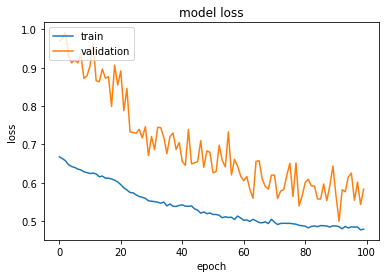

In [21]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

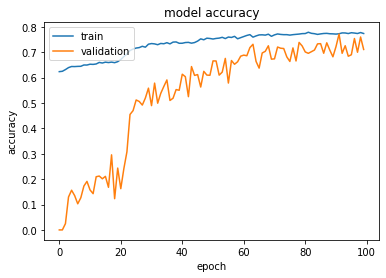

In [22]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
X1test = pd.DataFrame(columns = cols)
X2test = pd.DataFrame(columns = cols)
Ytest =  pd.DataFrame(columns = ['isSame'])

In [24]:
for i in range(len(subjects)):
  sub = subjects[i]
  df=pd.DataFrame.from_dict(data[data.subject==sub])
  df=df.reset_index(drop=True)
  for j in range(50):
    value1 = randint(0, 399)
    value2 = randint(0, 399)
    if (value1 == value2):
      while value1 == value2 :
        value2 = randint(0,399)   
    X1test=X1test.append(df.loc[value1].to_frame().transpose())
    X2test=X2test.append(df.loc[value2].to_frame().transpose())
    df1 = {'isSame': 1}
    Ytest=Ytest.append(df1, ignore_index = True)

In [25]:
for i in range(len(subjects)):
  sub = subjects[i]
  df=pd.DataFrame.from_dict(data[data.subject!=sub])
  df=df.reset_index(drop=True)
  row,col=df.shape
  for j in range(50):
    value1 = randint(0, row-1)
    value2 = randint(0, row-1)
    if (value1 == value2):
      while value1 == value2 :
        value2 = randint(0,row-1)   
    X1test=X1test.append(df.loc[value1].to_frame().transpose())
    X2test=X2test.append(df.loc[value2].to_frame().transpose())
    df1 = {'isSame': 0}
    Ytest=Ytest.append(df1, ignore_index = True)

In [26]:
X1test=X1test.drop(['subject','sessionIndex','rep'], axis=1)
X1test.reset_index(drop=True)

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.1301,0.1923,0.0622,0.0824,0.1284,0.046,0.0779,0.1262,0.0483,0.0892,...,0.0929,0.1331,0.0402,0.0723,0.175,0.1027,0.0971,0.2442,0.1471,0.0824
1,0.1,0.1284,0.0284,0.0829,0.2223,0.1394,0.0858,0.1666,0.0808,0.0966,...,0.1027,0.1613,0.0586,0.0737,0.1951,0.1214,0.0916,0.2205,0.1289,0.0803
2,0.0795,0.1407,0.0612,0.0874,0.1423,0.0549,0.066,0.1054,0.0394,0.0784,...,0.0954,0.0906,-0.0048,0.0732,0.1634,0.0902,0.0847,0.192,0.1073,0.0795
3,0.1016,0.13,0.0284,0.0847,0.1444,0.0597,0.0774,0.0927,0.0153,0.0895,...,0.1019,0.056,-0.0459,0.0961,0.2346,0.1385,0.0858,0.2646,0.1788,0.0797
4,0.0927,0.1182,0.0255,0.0702,0.1185,0.0483,0.0663,0.0877,0.0214,0.0715,...,0.1167,0.0592,-0.0575,0.0763,0.1602,0.0839,0.0679,0.1615,0.0936,0.0805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,0.1576,0.2354,0.0778,0.1404,0.2573,0.1169,0.1285,0.5713,0.4428,0.1497,...,0.179,0.151,-0.028,0.1315,0.1822,0.0507,0.1341,0.239,0.1049,0.1217
5096,0.0861,0.3117,0.2256,0.1146,0.1642,0.0496,0.0869,0.2205,0.1336,0.0758,...,0.0908,0.1149,0.0241,0.0845,0.1964,0.1119,0.1069,0.2263,0.1194,0.1029
5097,0.0729,0.0992,0.0263,0.0787,0.1012,0.0225,0.0805,0.0826,0.0021,0.0457,...,0.1136,0.1107,-0.0029,0.0373,0.1297,0.0924,0.0874,0.2863,0.1989,0.0808
5098,0.0364,0.8385,0.8021,0.0551,0.2766,0.2215,0.0399,0.4745,0.4346,0.052,...,0.0678,0.3674,0.2996,0.0356,0.6223,0.5867,0.0351,0.5062,0.4711,0.0443


In [27]:
X2test=X2test.drop(['subject','sessionIndex','rep'], axis=1)
X2test.reset_index(drop=True)

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0.0993,0.1393,0.04,0.0689,0.1383,0.0694,0.0729,0.0605,-0.0124,0.1069,...,0.1421,0.1278,-0.0143,0.1014,0.2265,0.1251,0.1309,0.2466,0.1157,0.0969
1,0.1225,0.2626,0.1401,0.0755,0.1328,0.0573,0.0855,0.1539,0.0684,0.0737,...,0.114,0.1719,0.0579,0.0784,0.2146,0.1362,0.0869,0.2984,0.2115,0.0591
2,0.0866,0.1507,0.0641,0.0884,0.1241,0.0357,0.0578,0.1048,0.047,0.0876,...,0.1072,0.0858,-0.0214,0.0761,0.1711,0.095,0.0713,0.187,0.1157,0.0681
3,0.1051,0.1992,0.0941,0.0932,0.1645,0.0713,0.0697,0.1278,0.0581,0.0898,...,0.1095,0.1352,0.0257,0.0763,0.2014,0.1251,0.0879,0.2208,0.1329,0.0742
4,0.1106,0.1195,0.0089,0.0908,0.1346,0.0438,0.0898,0.0792,-0.0106,0.0932,...,0.1241,0.1484,0.0243,0.0911,0.1777,0.0866,0.1362,0.2303,0.0941,0.0855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,0.0911,0.2119,0.1208,0.1357,0.2276,0.0919,0.1167,0.2402,0.1235,0.1045,...,0.1183,0.1632,0.0449,0.1006,0.2447,0.1441,0.0905,0.3545,0.264,0.1074
5096,0.0551,0.7652,0.7101,0.0647,0.0549,-0.0098,0.1053,0.1088,0.0035,0.0807,...,0.0878,0.1567,0.0689,0.0729,0.057,-0.0159,0.0889,0.3074,0.2185,0.0557
5097,0.149,0.1895,0.0405,0.1435,0.2416,0.0981,0.1577,0.1786,0.0209,0.1253,...,0.1934,0.071,-0.1224,0.1881,0.2226,0.0345,0.2244,0.3187,0.0943,0.1554
5098,0.1021,0.0764,-0.0257,0.0879,0.1997,0.1118,0.0778,0.1775,0.0997,0.0923,...,0.1256,0.2119,0.0863,0.0942,0.163,0.0688,0.1416,0.243,0.1014,0.1208


In [28]:
X1test = np.asarray(X1test).astype(np.float32)
X2test = np.asarray(X2test).astype(np.float32)

In [29]:
model.load_weights("best_weights.hdf5")
Ypred=model.predict([X1test,X2test])

160/160 [==============================] - 1s 5ms/step


In [30]:
Ypred = Ypred.reshape(-1).round().astype(int)

In [31]:
Ypred = pd.DataFrame(Ypred,columns=['isSame'])

In [32]:
Ytest = Ytest.astype(int)

In [33]:

def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

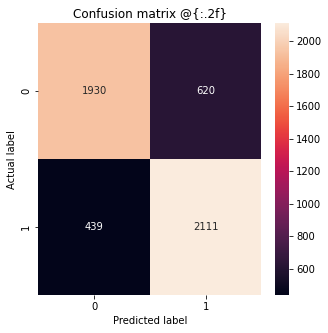

In [34]:
plot_cm(Ytest, Ypred)

In [35]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      2550
           1       0.77      0.83      0.80      2550

    accuracy                           0.79      5100
   macro avg       0.79      0.79      0.79      5100
weighted avg       0.79      0.79      0.79      5100

